### Introduction
This analysis uses clustering techniques, specifically the K-Means algorithm, to perform customer segmentation based on purchasing behavior.

The goal is to divide customers into distinct groups (clusters) based on their Annual Income and Spending Score, allowing businesses to better understand their client base and tailor marketing strategies for each segment.


In [4]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [6]:
#Load the dataset
df = pd.read_csv('Mall_Customers.csv')  


In [8]:
print(df.head())
print(df.info())
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [10]:
#Use 'Annual Income (k$)' and 'Spending Score (1-100)'
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

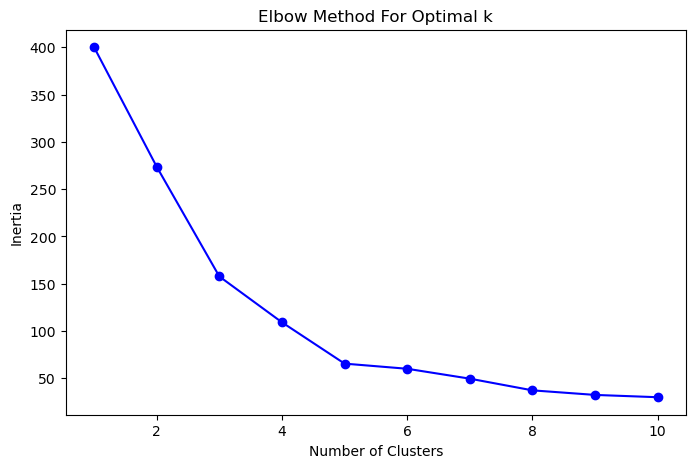

In [14]:
#Elbow Method to find optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
#Silhouette Score for each k
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f'Silhouette Score for k={k}: {score:.3f}')
#Apply KMeans with optimal k (let's assume k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


Silhouette Score for k=2: 0.397
Silhouette Score for k=3: 0.467
Silhouette Score for k=4: 0.494
Silhouette Score for k=5: 0.555
Silhouette Score for k=6: 0.514


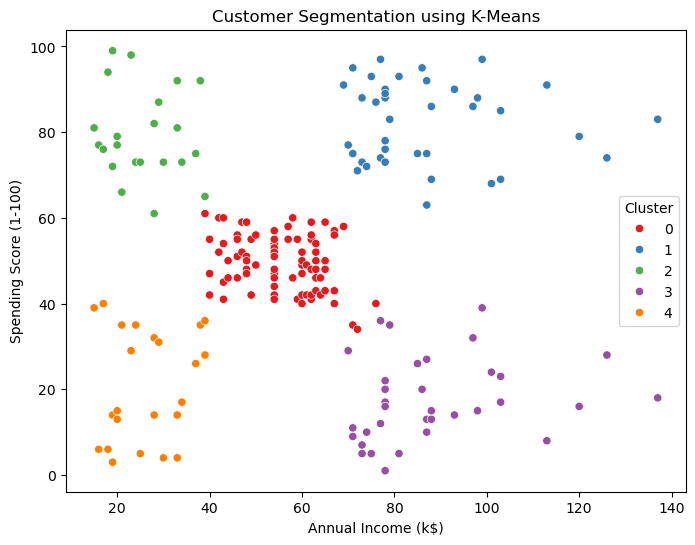

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set1'
)
plt.title('Customer Segmentation using K-Means')
plt.show()

### Conclusion
In this analysis, we used the K-Means algorithm to segment customers based on their annual income and spending score. After testing different numbers of clusters, we found that 5 clusters was the optimal number.

The clusters we obtained show different types of customers, such as those with high income and low spending, or low income and high spending. This gives us an idea of how customers behave and how we might target them differently.

This type of analysis is useful because it provides a better understanding of the different customer groups, which can help improve business decisions and tailor offers to the needs of each group.